*week 2 exercise - part 1*

# Basic Charts with Matplotlib

## Matplotlib

First, we import the required libraries, using standard conventions. We first import numpy for all our mathematical needs, then the matplotlib as plotting library and pyplot which gives an easy API to create plots with matplotlib. Later we will introduce Seaborn as well.

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# we need the following line to indicate that the plots should be shown inline with the Jupyter notebook.
%matplotlib inline 

We will first create a simple plot of a mathematical function. We first create a numpy array of x-values. Then for each x-value we create the y-value, i.e. the function value. Plotting this function is as easy as giving it the x and y values.

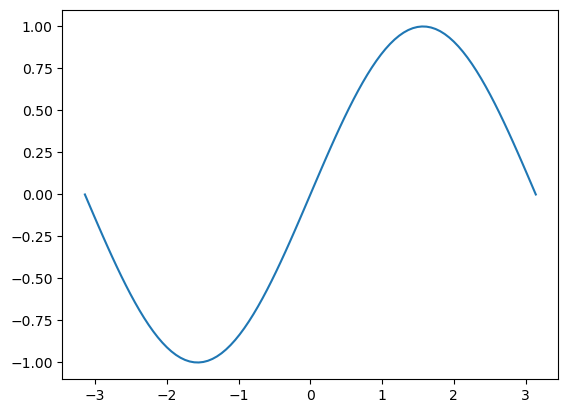

In [2]:
X = np.linspace(-np.pi, np.pi, 100) # define a NumPy array with 100 points in the range -Pi to Pi
Y = np.sin(X)  # define the curve Y by the sine of X

plt.plot(X,Y); # use matplotlib to plot the function

While creating such plots is perfectly fine when you are exploring data, in your final notebook the plot is hard to understand for the reader. With matplotlib it is very easy to add labels, a title and a legend. You can also change the limits of the plot, the style of the lines and much more.

The following could be seen as the bare minimum for a plot to be understood as part of reproducible research.

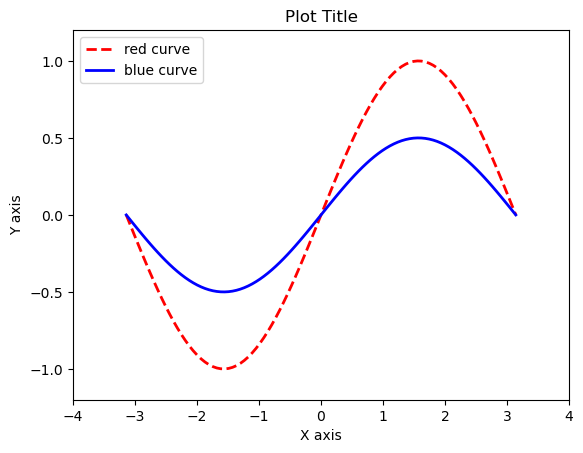

In [3]:
plt.plot(X, Y, 'r--', linewidth=2)
plt.plot(X, Y/2, 'b-', linewidth=2)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Plot Title')
plt.xlim(-4, 4)
plt.ylim(-1.2, 1.2)
plt.legend(['red curve', 'blue curve'], loc='best')

Go to the documentation pages of Matplotlib [http://matplotlib.org/contents.html](http://matplotlib.org/contents.html) to find all the possible options for a plot and also to see more tutorials, videos and book chapters to help you along the way.

Another nice tutorials:
* [http://www.labri.fr/perso/nrougier/teaching/matplotlib/](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

This assignment first shows you how to download csv data from an online source. Then we're exploring a dataset of all the cities in the world and compare cities in The Netherlands to the rest of the world.

## Loading data CSV and Pandas
We will work with a database of information about cities around the world:

[https://dev.maxmind.com/geoip/geoip2/geolite2/](https://dev.maxmind.com/geoip/geoip2/geolite2/)

Working with data structures can be done in many ways in Python. There are the standard Python arrays, lists and tuples. You can also use the arrays in the numpy package which allow you to do heavy math operations efficiently. For data analysis Pandas is often used, because data can be put into so-called dataframes. Dataframes store data with column and row names and can easily be manipulated and plotted. You will learn more about Pandas in the Machine Learning workshops. A short intro can be found here:

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [17]:
import urllib.request as urllib, zipfile, os

url = 'https://github.com/CODAIT/redrock/raw/master/twitter-decahose/src/main/resources/Location/'
filename = 'worldcitiespop.txt.gz'
datafolder = 'data/'

In [18]:
downloaded = urllib.urlopen(url + filename)
buf = downloaded.read()

try:
    os.mkdir(datafolder)
except FileExistsError:
    pass

with open(datafolder + filename, 'wb') as f:
    f.write(buf)

In [19]:
import pandas as pd
# reading files may cause problems or give errors... Can you explain the use of the encoding parameter?
cities = pd.read_csv(datafolder + filename, sep=',', low_memory=False, encoding = 'ISO-8859-1')

## Data Manipulation

We can take a peek at the data by checking out the final rows of data. Do you see any potential problem with this dataset?

In [7]:
cities.tail()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
3173953,zw,zimre park,Zimre Park,04,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,00,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,04,NaN,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,06,NaN,-20.033333,27.933333
3173957,zw,zvishavane,Zvishavane,07,79876.0,-20.333333,30.033333


In [8]:
cities.sort_values(by='Population', ascending=False).head(10)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
1544449,jp,tokyo,Tokyo,40,31480498.0,35.685000,139.751389
570824,cn,shanghai,Shanghai,23,14608512.0,31.045556,121.399722
1327914,in,bombay,Bombay,16,12692717.0,18.975000,72.825833
2200161,pk,karachi,Karachi,05,11627378.0,24.905600,67.082200
1349146,in,new delhi,New Delhi,07,10928270.0,28.600000,77.200000
1331162,in,delhi,Delhi,07,10928270.0,28.666667,77.216667
2130459,ph,manila,Manila,D9,10443877.0,14.604200,120.982200
2461968,ru,moscow,Moscow,48,10381288.0,55.752222,37.615556
1626528,kr,seoul,Seoul,11,10323448.0,37.598500,126.978300
316800,br,sao paulo,São Paulo,27,10021437.0,-23.473293,-46.665803


By sorting the cities on population we immediately see the entries of a few of the largest cities in the world.

## Assignment 1a
To get an idea of where in the world the cities in the dataset are located, we want to make a scatter plot of the position of all the cities in the dataset.

Don't worry about drawing country borders, just plot the locations of the cities.

Remember to use all the basic plot elements you need to understand this plot.

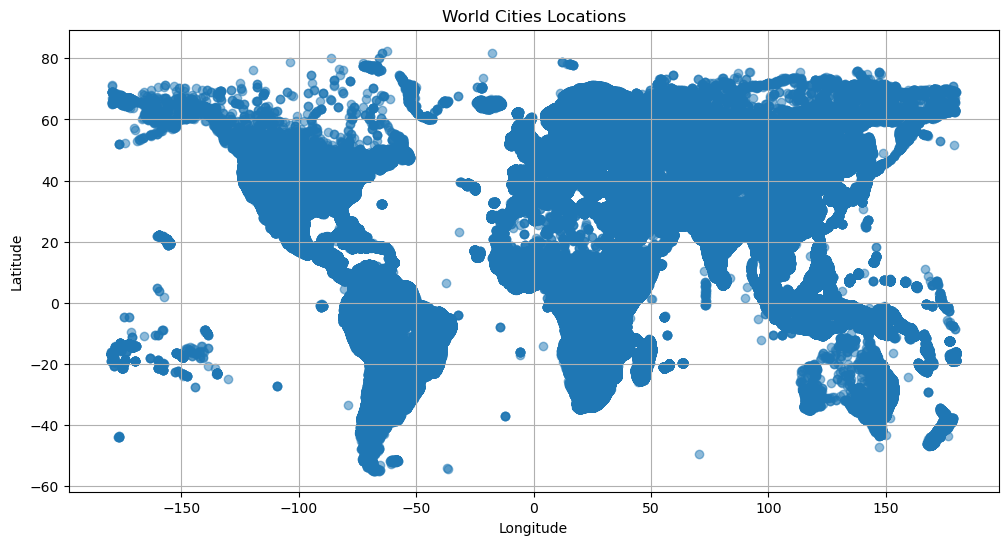

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Setting up the figure for plotting
plt.figure(figsize=(12, 6))  # Sizing the figure to fit our data

# The dataset file is a plain text file, so we'll read it directly
filename = 'data/worldcitiespop.txt' 

# Read the dataset using pandas
df_cities = pd.read_csv(filename, header=0, sep=',', encoding='ISO-8859-1', low_memory=False)

# Extract latitude and longitude from the dataframe
latitude = df_cities['Latitude']
longitude = df_cities['Longitude']

# Create a scatter plot using latitude and longitude
plt.scatter(longitude, latitude, alpha=0.5)

# Adding essential plot elements
plt.title('World Cities Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()

## Assignment 1b

Now we want to plot the cities in The Netherlands only. Use a scatter plot again to plot the cities, but now vary the size of the marker and the color with the population of that city.

Use a colorbar to show how the color of the marker relates to its population.

Use sensible limits to your axes so that you show only mainland The Netherlands (and not the Dutch Antilles).

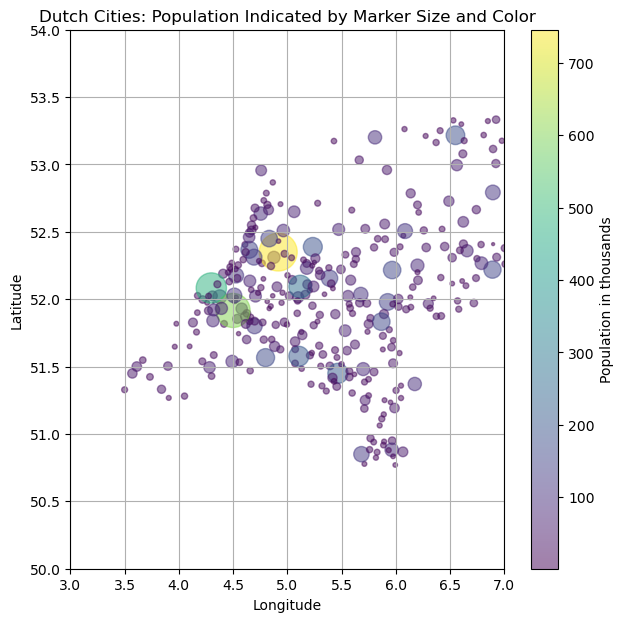

In [28]:
dutch_cities = cities[cities['Country'] == 'nl']
plt.figure(figsize=[7, 7])

# I think its best if we scale population down by dividing by 1000
marker_size = dutch_cities['Population'] / 1000

# Use the population itself to determine the color - map the population to a colormap and colorbar
plt.scatter(dutch_cities['Longitude'], dutch_cities['Latitude'], s=marker_size, c=marker_size, cmap='viridis', alpha=0.5)

# Adding a colorbar that relates to population
plt.colorbar(label='Population in thousands')

# Limits for the axes to focus on mainland Netherlands
plt.xlim(3, 7)
plt.ylim(50, 54)

# Adding text elements for clarity
plt.title('Dutch Cities: Population Indicated by Marker Size and Color')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()

## Assignment 1c

Using assignment B, we could clearly see larger cities such as Amsterdam, Rotterdam and even Eindhoven. But we still do not really have a clear overview of how many big cities there are. To show a distribution we use a histogram plot.

What happens if we do not call the .dropna() function?

Add proper basic plot elements to this plot and try to annotate which data point is Amsterdam and Eindhoven.

> Explanation of .dropna() func:

The .dropna() function is used to remove missing values (NaNs) from the data. 

If we do not call .dropna(), any NaN values in the 'Population' column will cause an error when trying to plot the histogram, as the histogram function cannot handle NaN values.

#### Attempt 1

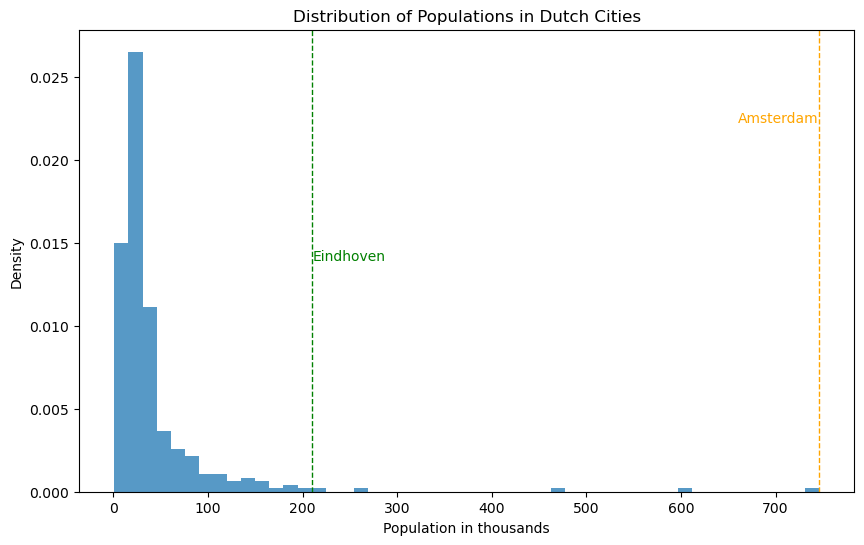

In [58]:
plt.figure(figsize=[10, 6]);

# Calculate the population in thousands
population_in_thousands = np.asarray(dutch_cities['Population'] / 1000)

# Create the histogram plot
plt.hist(population_in_thousands, bins=50, alpha=0.75, density=True)

# Adding basic plot elements
plt.title('Distribution of Populations in Dutch Cities')
plt.xlabel('Population in thousands')
plt.ylabel('Density')

# Population values for Amsterdam and Eindhoven from the dataset
amsterdam_population = dutch_cities[dutch_cities['City'].str.contains('Amsterdam', case=False, na=False)]['Population'].iloc[0] / 1000
eindhoven_population = dutch_cities[dutch_cities['City'].str.contains('Eindhoven', case=False, na=False)]['Population'].iloc[0] / 1000

# Annotate on the histogram
plt.axvline(amsterdam_population, color='orange', linestyle='dashed', linewidth=1)
plt.text(amsterdam_population, plt.ylim()[1]*0.8, 'Amsterdam', color='orange', horizontalalignment='right')

plt.axvline(eindhoven_population, color='green', linestyle='dashed', linewidth=1)
plt.text(eindhoven_population, plt.ylim()[1]*0.5, 'Eindhoven', color='green', horizontalalignment='left')

plt.show()

#### Attempt 2

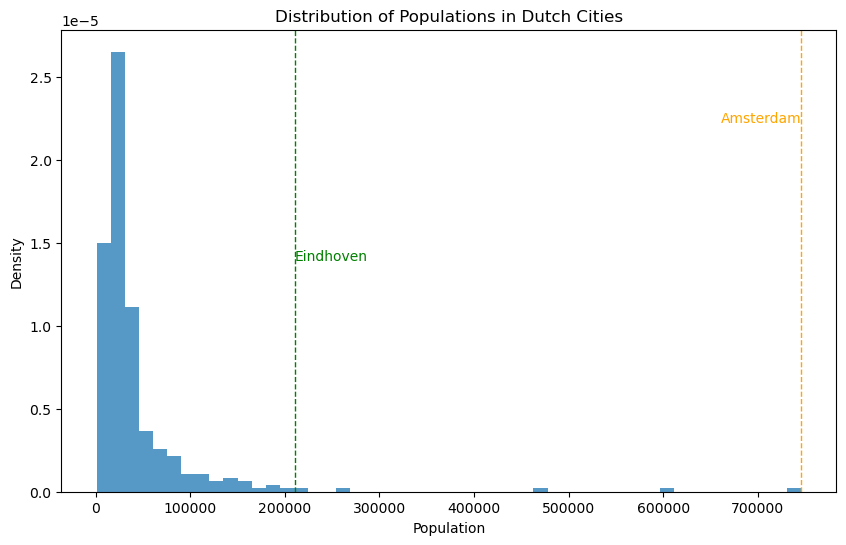

In [57]:
plt.figure(figsize=[10, 6]);

# Keep the actual population values
population_values = np.asarray(dutch_cities['Population'].dropna())

# Create the histogram plot with actual population values
plt.hist(population_values, bins=50, alpha=0.75, density=True)

# Adding basic plot elements
plt.title('Distribution of Populations in Dutch Cities')
plt.xlabel('Population')
plt.ylabel('Density')

# Population values for Amsterdam and Eindhoven from the dataset
amsterdam_population = dutch_cities[dutch_cities['City'].str.contains('Amsterdam', case=False, na=False)]['Population'].sum()
eindhoven_population = dutch_cities[dutch_cities['City'].str.contains('Eindhoven', case=False, na=False)]['Population'].sum()

# Annotate on the histogram
plt.axvline(amsterdam_population, color='orange', linestyle='dashed', linewidth=1)
plt.text(amsterdam_population, plt.ylim()[1]*0.8, 'Amsterdam', color='orange', horizontalalignment='right')

plt.axvline(eindhoven_population, color='green', linestyle='dashed', linewidth=1)
plt.text(eindhoven_population, plt.ylim()[1]*0.5, 'Eindhoven', color='green', horizontalalignment='left')

plt.show()

## Assignment 1d

Now we want to compare how the distribution of Dutch cities compares to that of the entire world.

Use subplots to show the dutch distribution (top plot) and the world distribution (bottom plot).

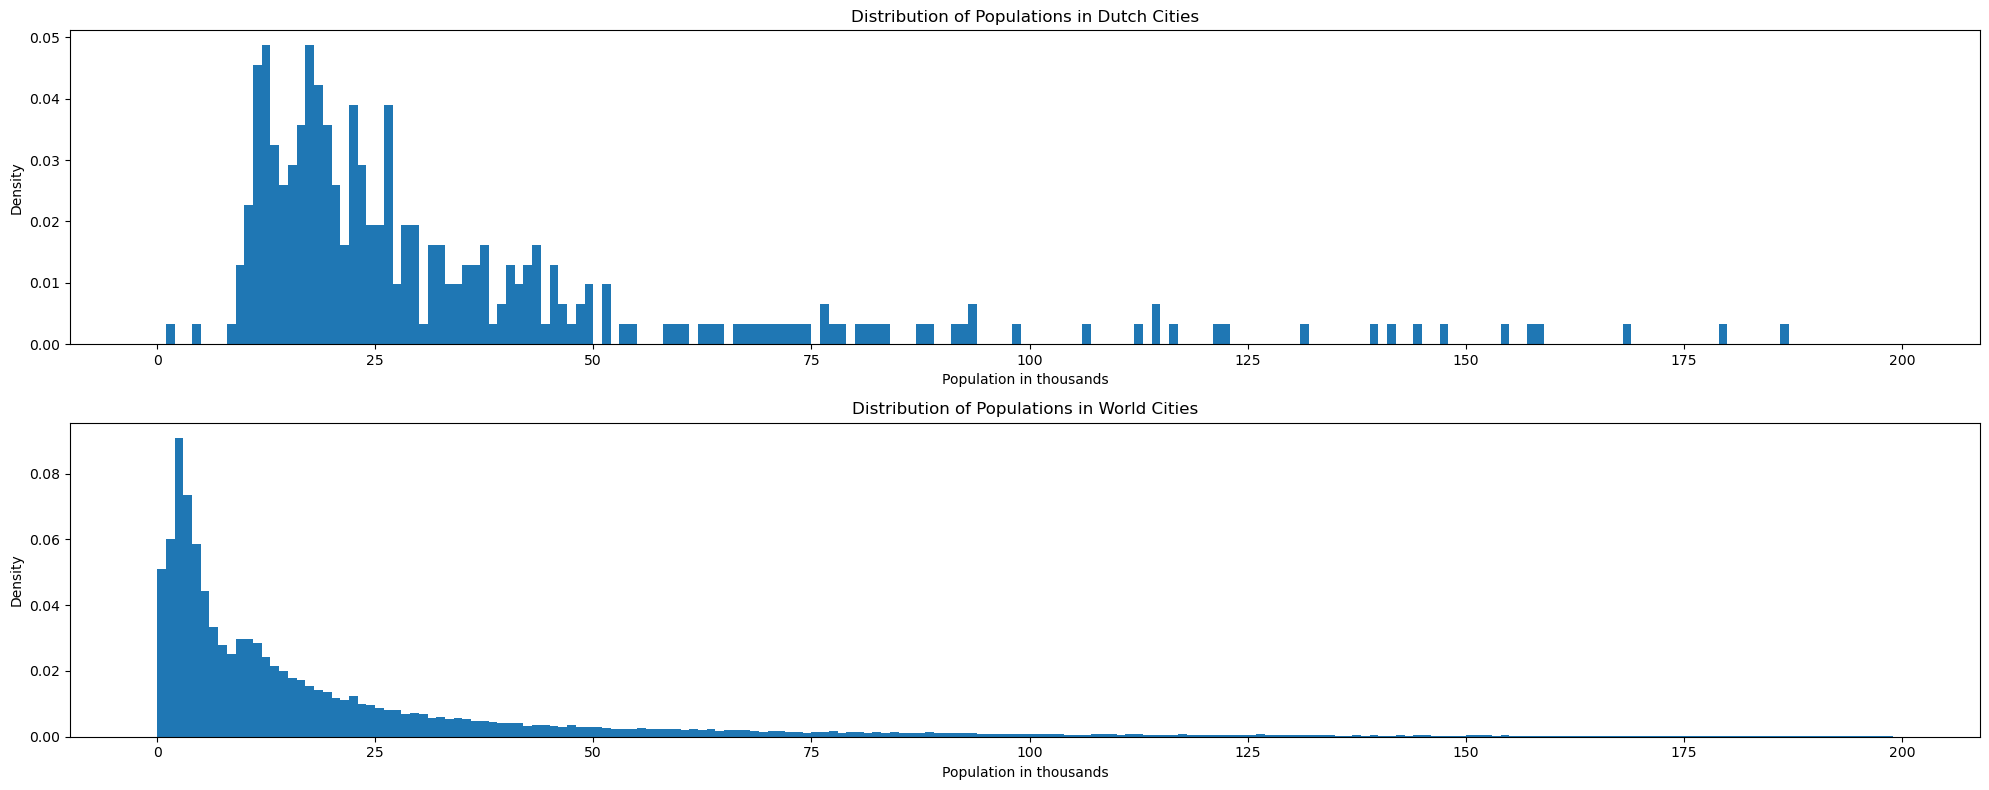

In [65]:
plt.figure(figsize=[20, 8]);

# Plot the histogram for Dutch cities
plt.subplot(2, 1, 1);
# drop NaN values because we are looking at the distribution of known populations
plt.hist(np.asarray(dutch_cities.dropna()['Population'] / 1000), bins=np.arange(0, 200, 1), density=True)
plt.title('Distribution of Populations in Dutch Cities')
plt.xlabel('Population in thousands')
plt.ylabel('Density')

# plot the histogram for cities worldwide
plt.subplot(2, 1, 2);
# also need to drop NaN values for the same reason
plt.hist(np.asarray(cities.dropna()['Population'] / 1000), bins=np.arange(0, 200, 1), density=True)
plt.title('Distribution of Populations in World Cities')
plt.xlabel('Population in thousands')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()


## Assignment 1e

Write what conclusions you can deduce from the above plots?

## Conclusions from Population Distribution Plots

Based on the histograms comparing the population distribution of Dutch cities with the global cities, we can draw the following conclusions:

- The distribution of city populations in The Netherlands is more concentrated within a narrower range, suggesting a more uniform urban population size.

- Globally, there is a wider spread in city populations, with more extreme values, indicating the presence of both smaller and much larger cities than typically found in The Netherlands.

- The Dutch cities' population sizes are generally smaller when compared to the largest cities in the world, which can skew the global distribution towards higher values.

- There are fewer Dutch cities with very high populations (in the range of millions), which can be considered outliers in the global context. This indicates that while The Netherlands has densely populated cities, it lacks the megacities that are present in other parts of the world.


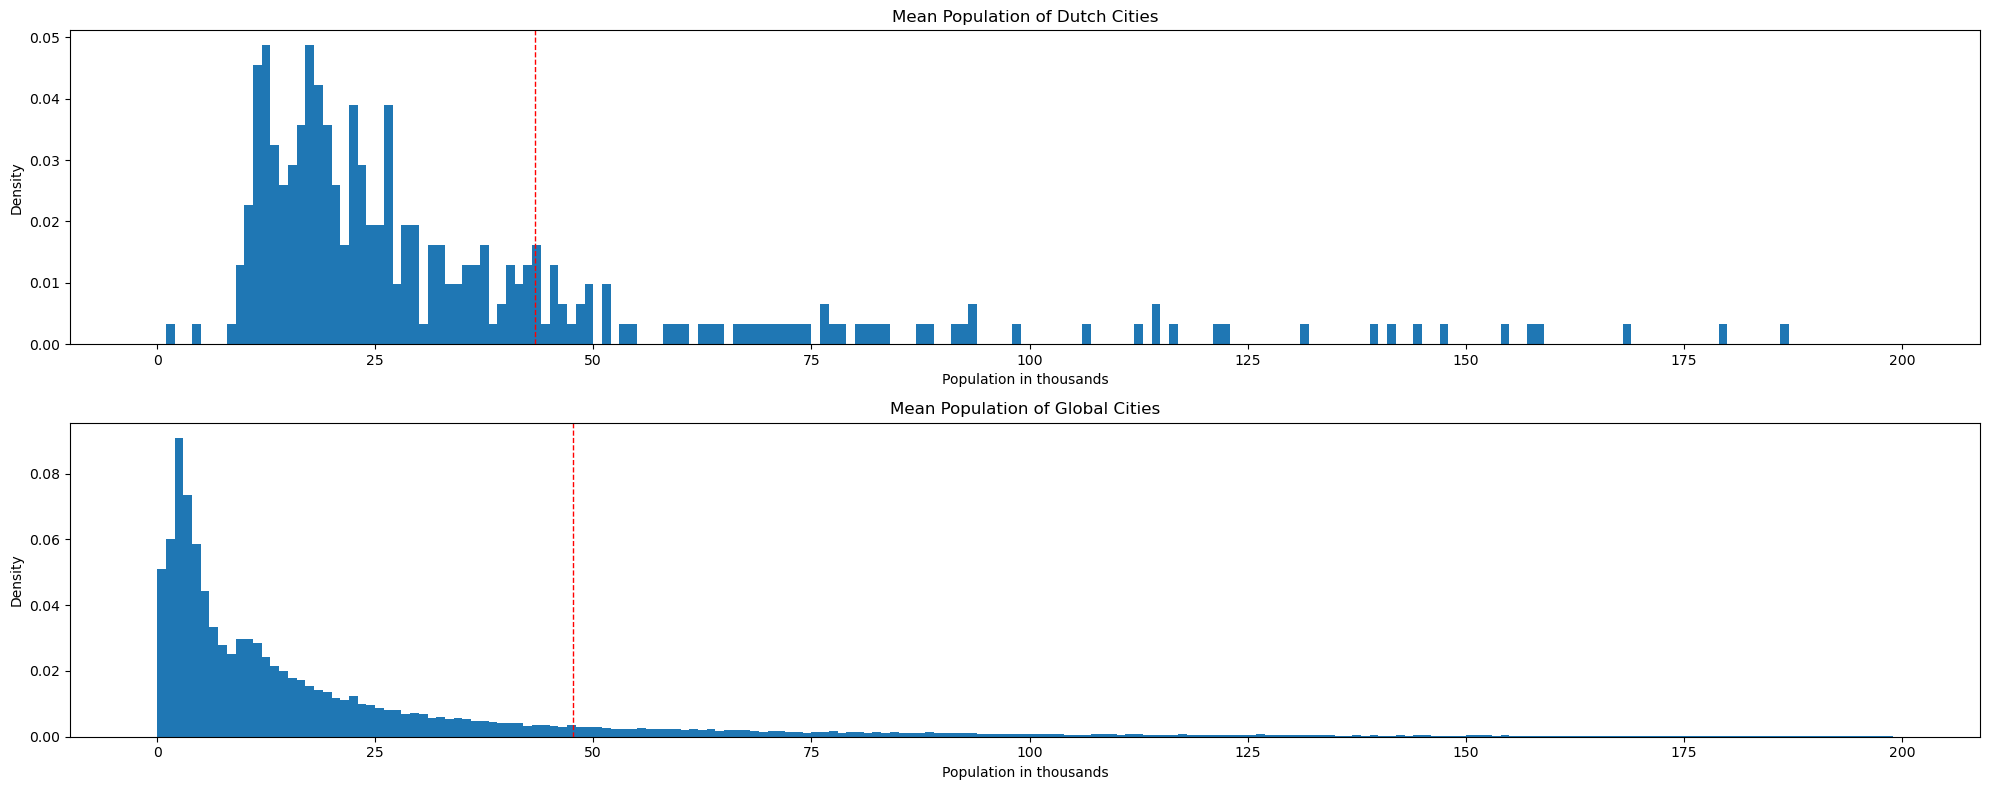

In [66]:
# Plotting mean lines for Dutch and global cities
plt.figure(figsize=[20, 8])

# Plot for Dutch cities
plt.subplot(2, 1, 1)
plt.hist(np.asarray(dutch_cities.dropna()['Population'] / 1000), bins=np.arange(0, 200, 1), density=True)
plt.axvline(dutch_cities.dropna()['Population'].mean() / 1000, color='red', linestyle='dashed', linewidth=1)
plt.title('Mean Population of Dutch Cities')
plt.xlabel('Population in thousands')
plt.ylabel('Density')

# Plot for global cities
plt.subplot(2, 1, 2)
plt.hist(np.asarray(cities.dropna()['Population'] / 1000), bins=np.arange(0, 200, 1), density=True)
plt.axvline(cities.dropna()['Population'].mean() / 1000, color='red', linestyle='dashed', linewidth=1)
plt.title('Mean Population of Global Cities')
plt.xlabel('Population in thousands')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

*week 2 exercise - part 2*

# Data visualization: Two additional Chart Types for Exploring

This assignment first shows two useful chart types: parallel coordinates and scatter matrix. You will practice these plots using a new dataset.

## Parallel Coordinates with Pandas

First, we import the required libraries, using standard conventions. For the example of parallel coordinates we shall use the famous iris data set, describing the sepal and petal dimensions for three types of irises.

In [1]:
import pandas as pd
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', sep=',', low_memory=False, encoding = 'ISO-8859-1', header=None)
iris.columns = ['sepal width','sepal length','petal width','petal length', 'name']

iris.head()

,sepal width,sepal length,petal width,petal length,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now we do not use matplotlib directly but use a plot function of the pandas library that uses matplotlib in the background. In this case we create a parallel coordinates plot.

Pandas has many plotting function as can be seen here: http://pandas.pydata.org/pandas-docs/stable/visualization.html#parallel-coordinates

The parallel coordinates plot can give insight into a dataset with a large number of features. For the iris set there are four features (petal width, petal length, sepal width, sepal length).

While you can make a scatter plot with 4 features using x,y,color and size; a parallel coordinates plot is usually easier to understand once you know how to read it. Here would be the scatter plot:

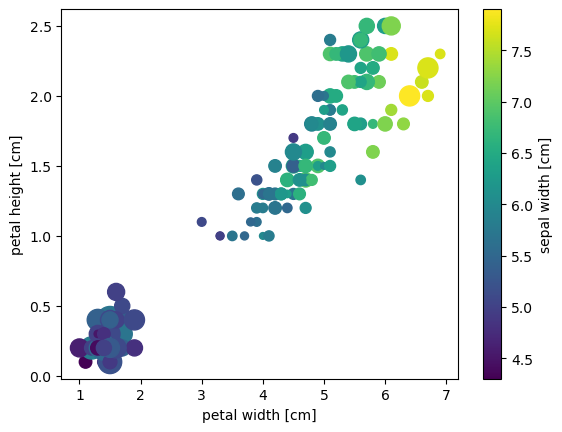

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure()
plt.scatter(iris['petal width'], iris['petal length'], c=iris['sepal width'], s=iris['sepal length']**4)
plt.xlabel('petal width [cm]')
plt.ylabel('petal height [cm]')
plt.colorbar(label='sepal width [cm]');

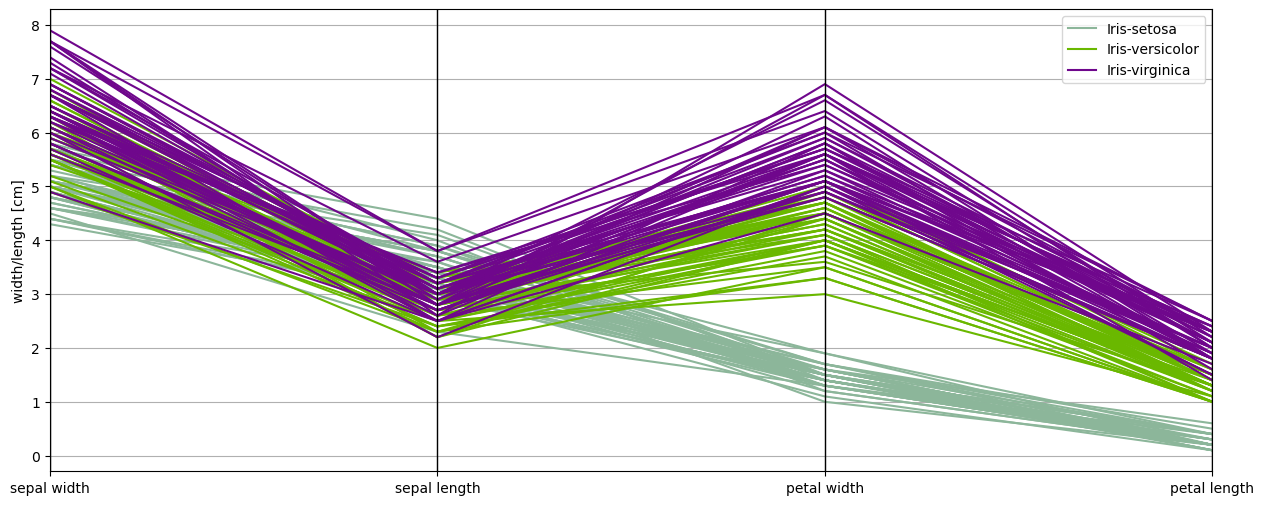

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline 

fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(iris,'name')
ax.set_ylabel('width/length [cm]');

## Scatter Matrix with Pandas

A scatter matrix is a chart that gives you an overview of the correlations between any number of feaures.

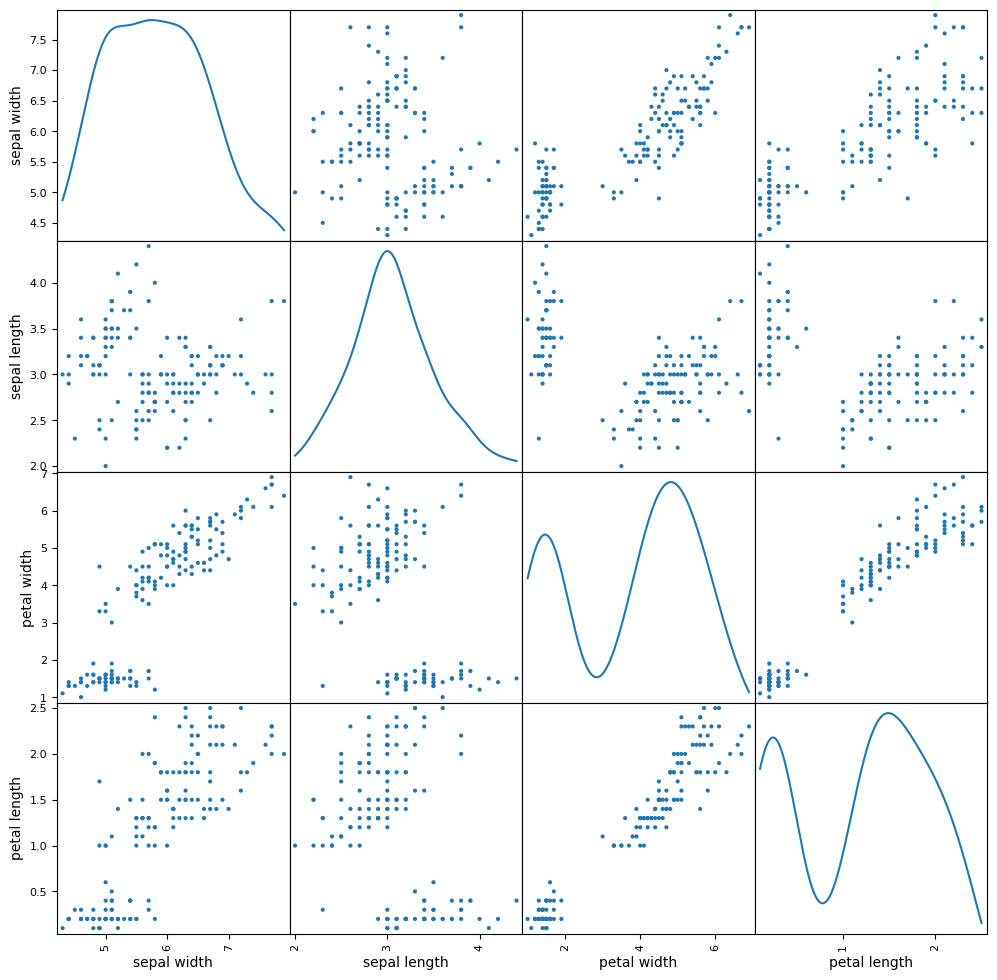

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, alpha=1, figsize=(12, 12), diagonal='kde');

/Users/martintomov/tensorflowtesting/env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


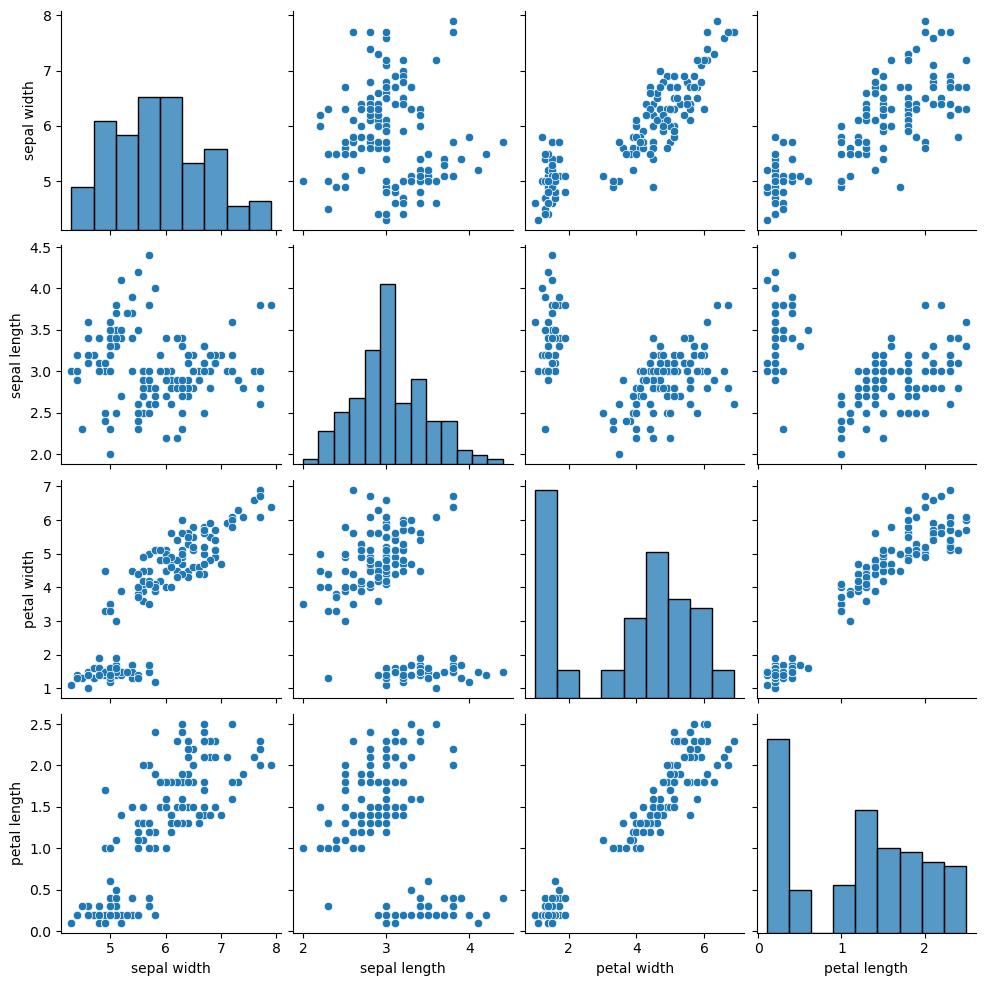

In [5]:
# or see what happens if we use the Seaborn library...
import seaborn as sns
sns.pairplot(iris)

/Users/martintomov/tensorflowtesting/env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


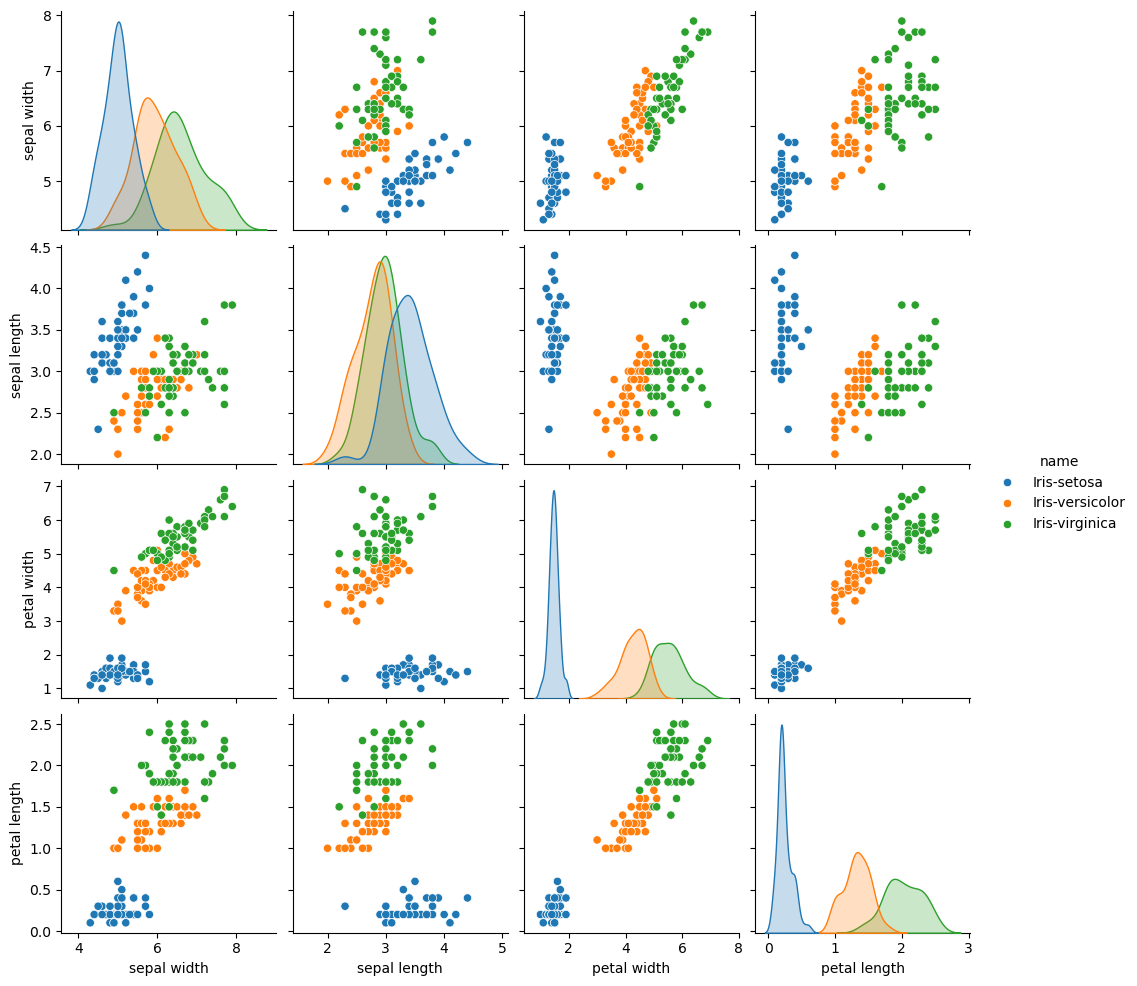

In [6]:
# Seaborn provides some simples ways to explore the data and correlations in more (visual) detail...
import seaborn as sns
sns.pairplot(iris, hue="name")

## Assignment
Now try to create similar plots for a new dataset about car features.

In [8]:
# The data file is quite nasty with several different delimeters that read_csv cannot handle very well
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name','j','k','l','m','n']
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delimiter=r"\s+", names=names, header=None, engine='python')
# Create a subset of dataset with all useful features
cars = cars.iloc[:,[0,1,2,4,5,6,7]]


# Create a normalized dataset
using Mean normalization (see: https://en.wikipedia.org/wiki/Feature_scaling#Mean_normalization)

In [12]:
cars_norm = cars # extend this code to create a normalized set
cars_norm = cars.copy()

# Perform mean normalization on all features except 'origin' as it's categorical
for column in cars_norm.columns:
    if column != 'origin':
        column_mean = cars_norm[column].mean()
        column_range = cars_norm[column].max() - cars_norm[column].min()
        cars_norm[column] = (cars_norm[column] - column_mean) / column_range

# Display the first 10 rows of the normalized dataset
cars_norm.head(10)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,-0.146664,0.509045,0.293473,0.151283,-0.212386,-0.500838,1
1,-0.226451,0.509045,0.404584,0.204870,-0.242148,-0.500838,1
2,-0.146664,0.509045,0.321897,0.132003,-0.271910,-0.500838,1
3,-0.199856,0.509045,0.285721,0.131153,-0.212386,-0.500838,1
4,-0.173260,0.509045,0.280553,0.135689,-0.301672,-0.500838,1
5,-0.226451,0.509045,0.608719,0.388595,-0.331434,-0.500838,1
6,-0.253047,0.509045,0.673318,0.392281,-0.390958,-0.500838,1
7,-0.253047,0.509045,0.637142,0.380373,-0.420720,-0.500838,1
8,-0.253047,0.509045,0.675902,0.412412,-0.331434,-0.500838,1
9,-0.226451,0.509045,0.507943,0.249383,-0.420720,-0.500838,1


Next, create a parallel coordinates plot. What happens when you do not use the normalized data?

> Answer: When we do not use normalized data in a parallel coordinates plot, features with larger numerical ranges can dominate the visualization, potentially twisting the interpretation of the data.

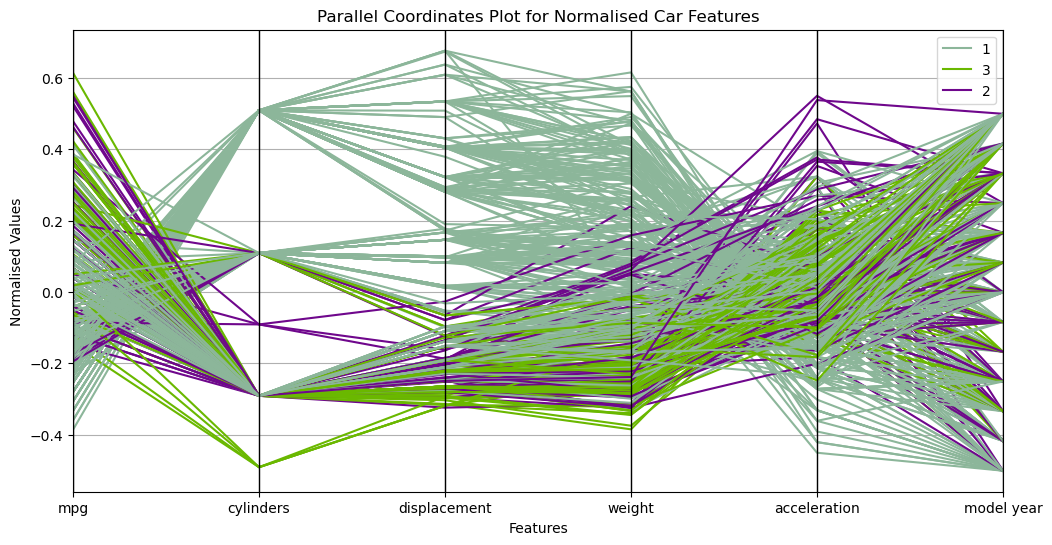

In [24]:
# version with normalised data
cars.head(10)
# Create the parallel coordinates plot here

from pandas.plotting import parallel_coordinates

# Plotting normalised data to see all features on the same scale
plt.figure(figsize=(12, 6))
parallel_coordinates(cars_norm, 'origin')
plt.title('Parallel Coordinates Plot for Normalised Car Features')
plt.xlabel('Features')
plt.ylabel('Normalised Values')
plt.show()


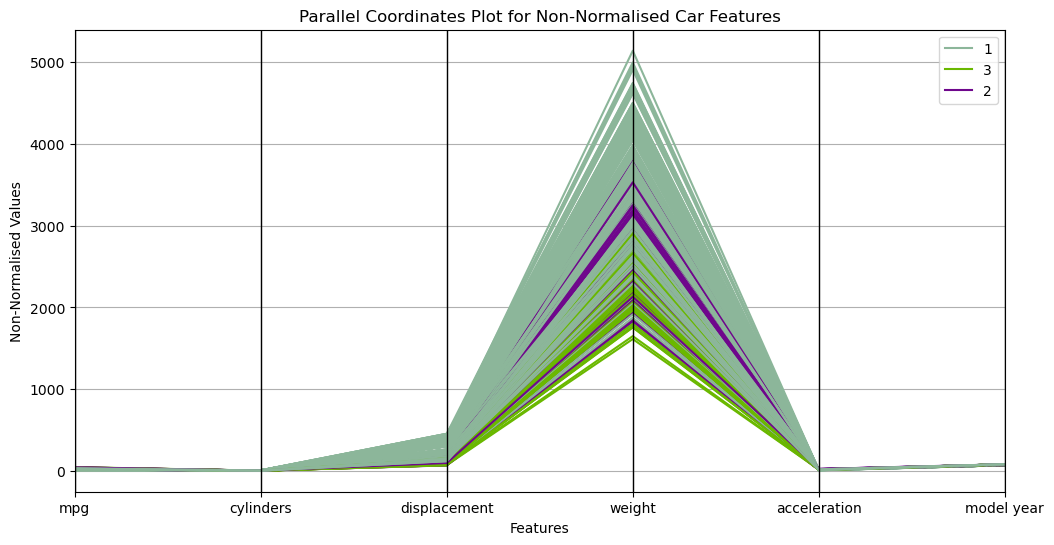

In [25]:
# version without normalised data
cars.head(10)
# Create the parallel coordinates plot here

from pandas.plotting import parallel_coordinates

# Plotting normalised data to see all features on the same scale without normalising the data
plt.figure(figsize=(12, 6))
parallel_coordinates(cars, 'origin')
plt.title('Parallel Coordinates Plot for Non-Normalised Car Features')
plt.xlabel('Features')
plt.ylabel('Non-Normalised Values')
plt.show()

Answer this question: What conclusions can you make from the relation between weight and acceleration? If you don't understand how to interpret parallel coordinates plots, read: https://eagereyes.org/techniques/parallel-coordinates.


In [26]:
## Answer here in Markdown - continue here tomorrow



Next, try to highlight the model years >= 80. 

Hints: 
* you can slice your data with ```cars_norm[cars['model year']>=80]```.
* you can plot both all data and the sliced data on top of each other with different colors  

In [27]:
## Create the parallel coordinates plot here
fig = plt.figure(figsize=[15,6])


<Figure size 1080x432 with 0 Axes>

Answer this question: what conclusions can you draw from cars with model years 80-82?

In [28]:
## Answers here in Markdown


Now, create a scatter matrix for the car data. 
Do we need to use the normalized data?
Are we looking for a dataset that we can easily cluster or will we get more luck looking for trends?

In [29]:
## Create the scatter matrix here


*What are your final conclusions looking at the (visual) results? What did you learn about the data and dataset? Or what new questions did you derive from the plots you've made?*